# Task 3. Regression

### 1. Import lubraries

In [1]:
# Standart data analysis libraries
import numpy as np
import pandas as pd
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Counter
from collections import Counter
# Models
from xgboost import XGBRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

#Scale data
from sklearn.preprocessing import StandardScaler 

# For model selections
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

### 2. Exploration analysis

In [2]:
df = pd.read_csv('internship_train.csv')

In [3]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304
5,70,299,297,350,428,359,5.830952,0.505189,1,73,...,1.486867,0.366128,11.245683,6.116113,9.315978,4.063209,7.156703,12.132241,14.141104,34.505189
6,457,363,162,67,388,326,-1.414214,0.604309,0,258,...,8.260282,5.239815,1.163579,10.797268,5.819056,4.451118,14.645322,11.739865,14.763017,2.604309
7,414,271,163,317,359,116,-6.324555,0.022464,0,485,...,5.925065,6.080010,11.318467,11.013787,12.137311,2.759765,10.537518,4.243830,3.232530,40.022464
8,420,85,378,71,243,301,-8.602325,0.228071,0,401,...,5.483159,1.534398,4.690240,11.142059,12.290323,1.975012,11.061706,14.486846,13.244187,74.228071
9,445,304,359,298,141,369,8.774964,0.919384,1,63,...,12.267670,4.999463,0.376892,0.121794,0.914422,12.471633,13.760204,14.500278,4.583603,77.919384


In [4]:
df.shape

(90000, 54)

So, we have 54 features and 90000 rows of data

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,...,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,...,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,...,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,...,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,...,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,...,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,...,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999987,1.000000,499.000000,...,14.999900,14.999528,14.999733,14.999478,14.999869,14.999928,14.999948,14.999364,14.999775,99.999482


Some features look identically. We need to do a correlation analysis to check correlation with features

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

All data is numeric, so we dont need to turn it. All features are not null.

(array([9084., 8948., 8967., 8944., 9033., 8855., 9011., 9197., 8967.,
        8994.]),
 array([2.63446314e-03, 1.00023192e+01, 2.00020040e+01, 3.00016888e+01,
        4.00013736e+01, 5.00010584e+01, 6.00007432e+01, 7.00004279e+01,
        8.00001127e+01, 8.99997975e+01, 9.99994823e+01]),
 <BarContainer object of 10 artists>)

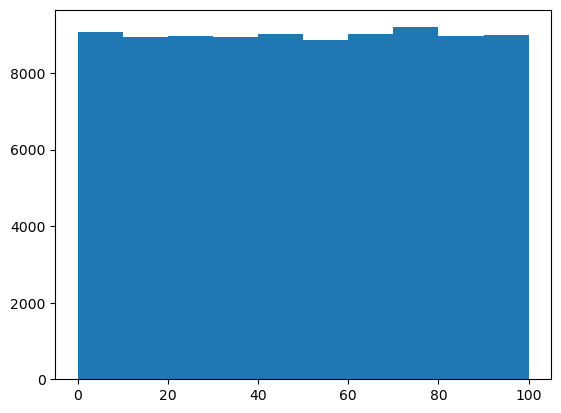

In [7]:
plt.hist(df.target)

### 3. Correlation analysis

<AxesSubplot:>

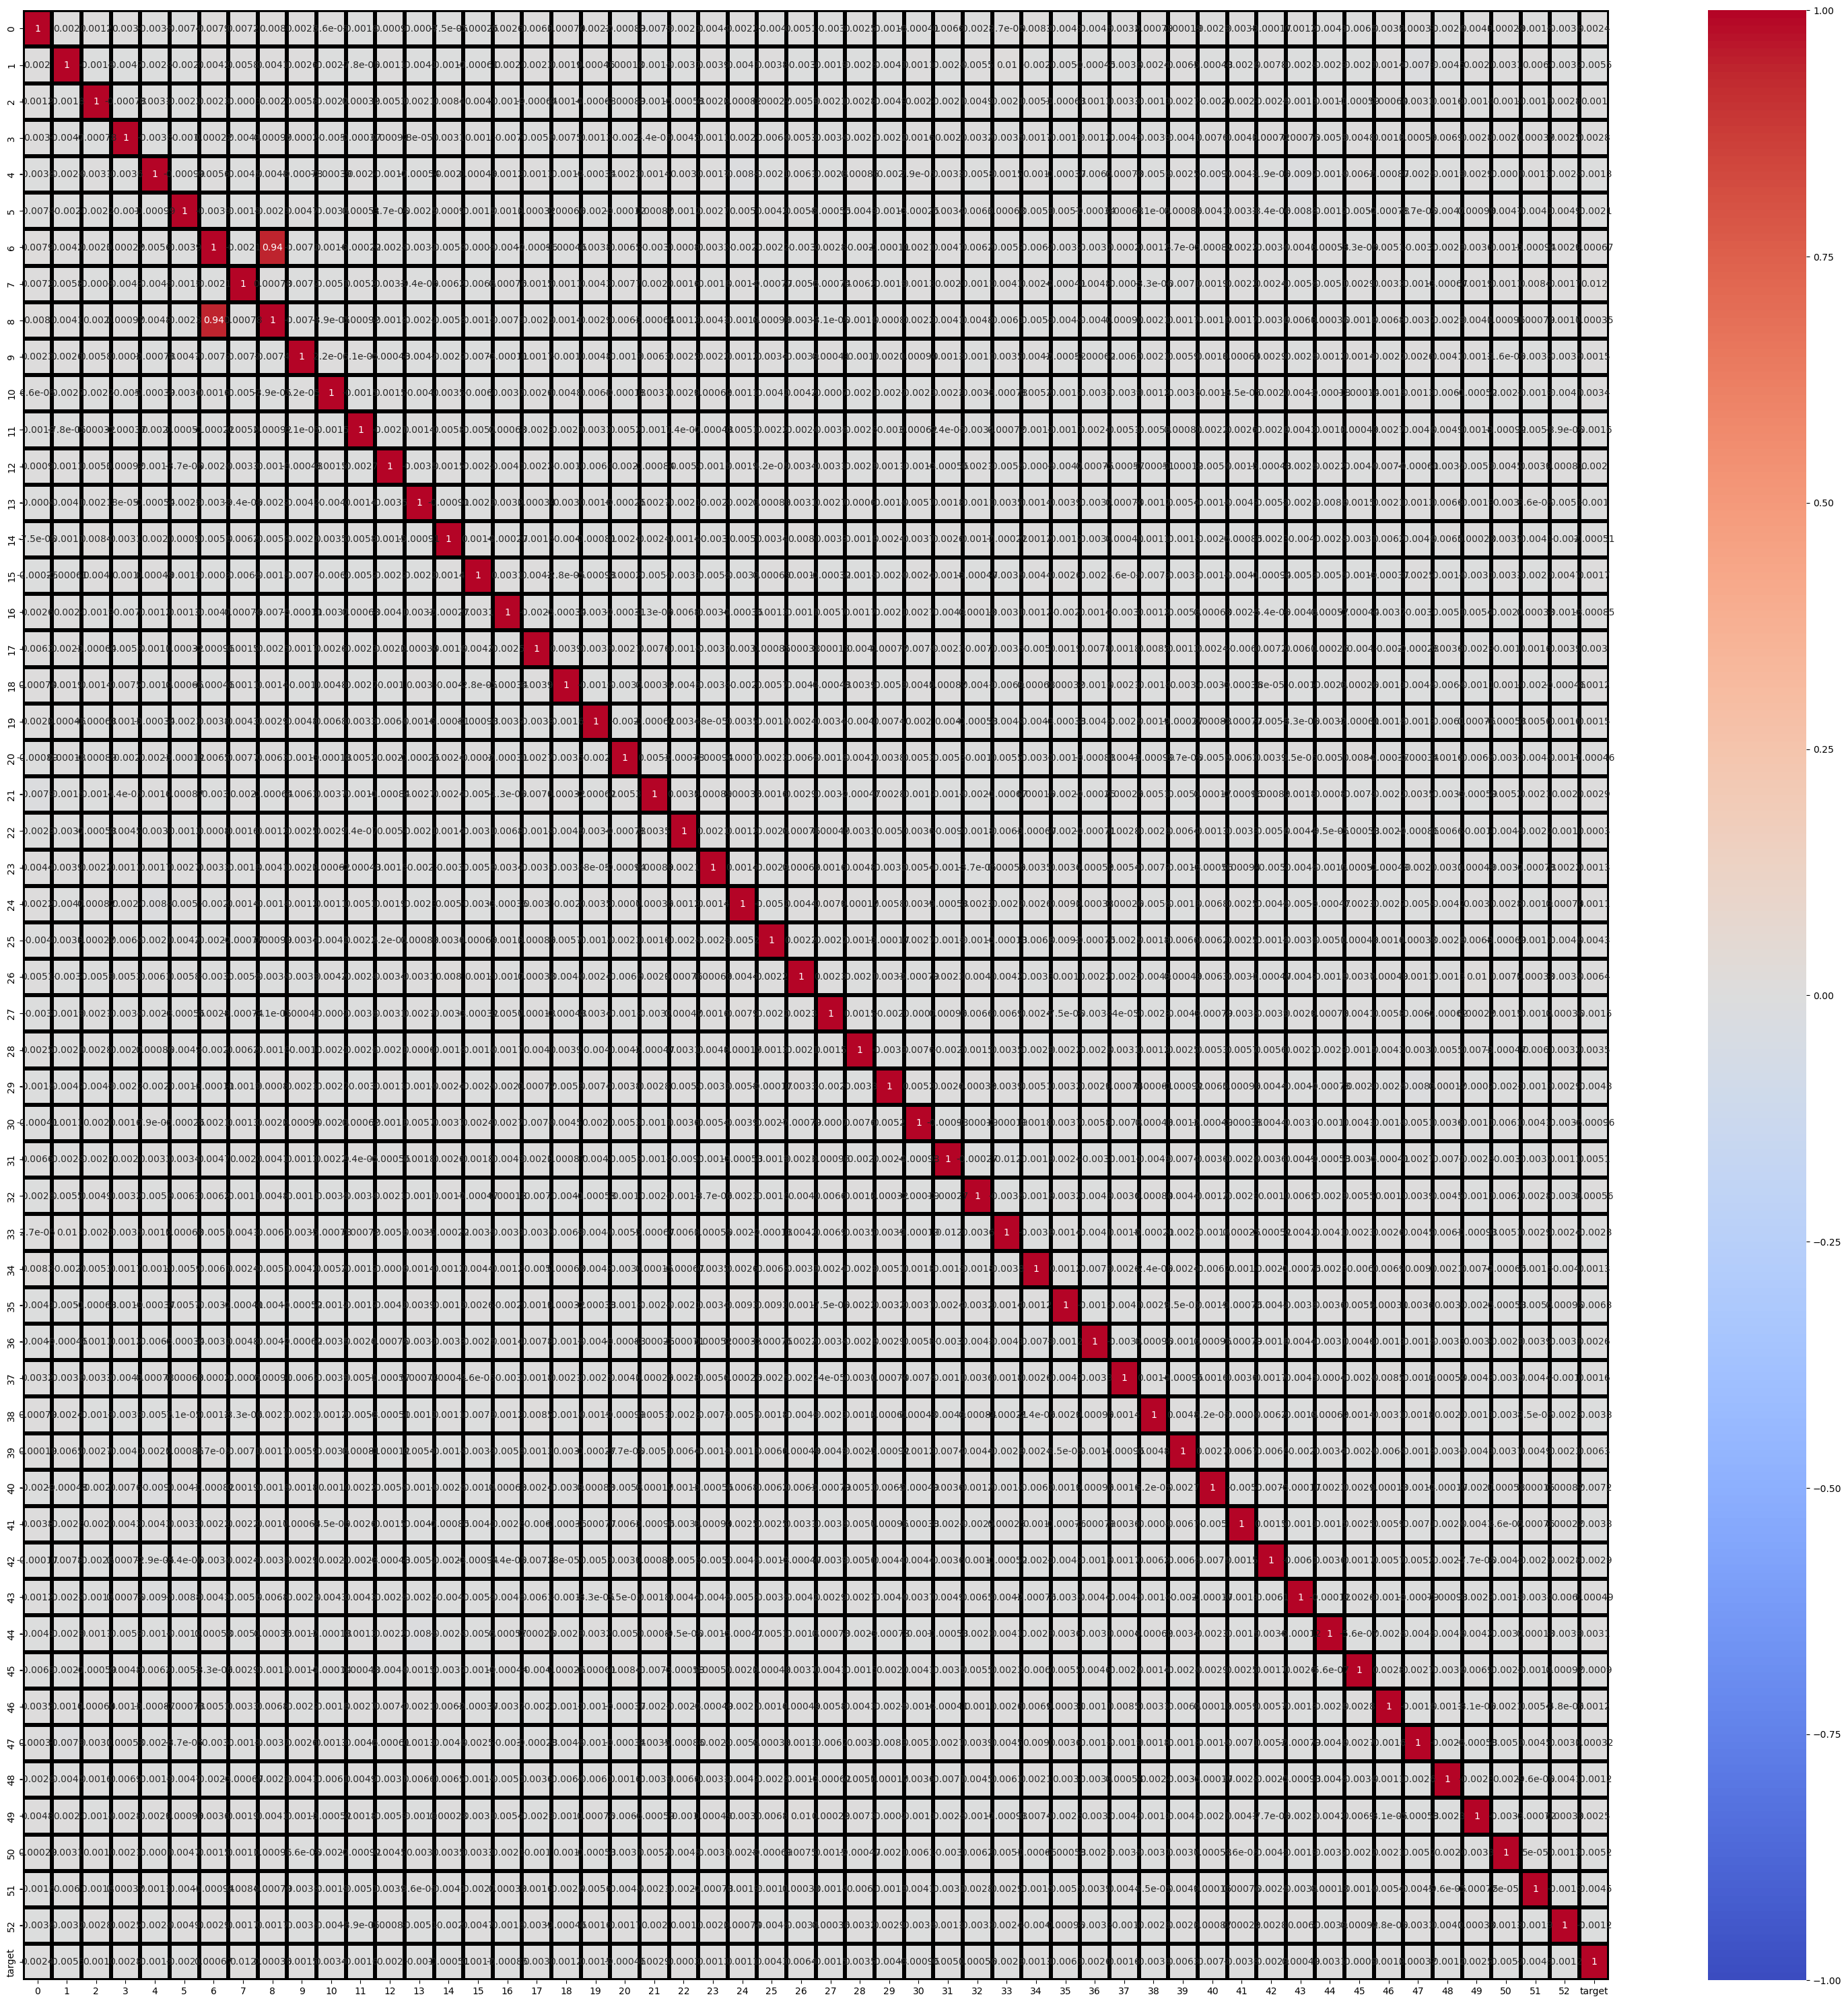

In [8]:
fig, ax = plt.subplots(figsize=(38,38))
coer = df.corr()         
sns.heatmap(coer, annot = True, ax=ax, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=4, linecolor='black')

In [9]:
df.corr()[df.corr()>0.1]

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.940016,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,0.940016,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So, we as we see there are 2 features which have a big correlation value: 6 and 8, so we need to drop one of them, which has lower approach to target.

In [10]:
assert df.shape[1] == 54
df = df.drop('8', axis = 1)

Also, there are too much features, which will make a problem to modeling, so we take features, which are the most influenced to target

In [11]:
df.corr().target.nlargest(11)

target    1.000000
7         0.012103
26        0.006370
39        0.006283
31        0.005077
25        0.004276
28        0.003451
10        0.003396
44        0.003092
17        0.002953
21        0.002874
Name: target, dtype: float64

So, we can make a list with this columns.

In [12]:
most_cor = df.corr().target.nlargest(11).index[1:].to_list()
most_cor

['7', '26', '39', '31', '25', '28', '10', '44', '17', '21']

In [13]:
df

,0,1,2,3,4,5,6,7,9,10,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,132,281,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,143,109,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,430,488,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,340,111,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,212,141,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,328,44,320,364,7,73,4.898979,0.563878,315,178,...,0.266362,6.185887,7.716837,10.144664,1.711649,3.849704,12.401903,14.195540,2.371207,24.563878
89996,217,472,174,327,255,389,-3.605551,0.861690,144,403,...,5.147059,4.209660,14.482770,1.375031,6.386263,10.107582,12.637902,6.576331,6.863238,13.861690
89997,189,406,213,57,494,190,6.164414,0.633704,221,341,...,14.902807,2.886534,8.683168,4.522339,1.556421,10.971184,7.792226,8.422623,3.041409,38.633704
89998,418,478,163,35,390,77,-3.605551,0.687309,289,410,...,12.743029,2.525611,11.050145,6.589943,12.622192,10.596839,0.647584,8.746364,1.246682,13.687309


### 4. Check for null, outliers and duplicated data

In [14]:
df.columns[df.isnull().sum() > 0] 

Index([], dtype='object')

In [15]:
df.duplicated().sum()

0

There is 0 null or duplicated data.

In [16]:
def IQR_method (df,n,features):
    
    outlier_list = []

    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

In [17]:
Outliers_IQR = IQR_method(df,1, df.columns)
dataset = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 0


### 5. Data scalling

In [18]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = df.drop('target', axis = 1)
X = X[most_cor]
y = df.target

In [19]:
X.shape

(90000, 10)

In [45]:
X = scaler_X.fit_transform(pd.DataFrame(X))
y = scaler_y.fit_transform(pd.DataFrame(y))
y.shape

(90000, 1)

In [21]:
y

array([[-1.03562391],
       [ 0.40591407],
       [ 0.85189158],
       ...,
       [-0.39451307],
       [-1.25779732],
       [ 0.33149459]])

### 6. Splitting our data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle = True)

In [23]:
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size = 0.5, random_state = 0, shuffle = True)
y_train = y_train.ravel()

So, we split data on train, dev and test datasets

### 7. Try different models

In [24]:
init_models = { 
                'Linear Regression': LinearRegression(),
                'XGBOOST': XGBRegressor(),
                'LGBM': LGBMRegressor(),
                'Decision tree': DecisionTreeRegressor()
                
               }
R2 = []
models_names = []
for i, (key,model) in enumerate(init_models.items()):
    model.fit(X_train, y_train)
    print(f'{model} fitted')
    models_names.append(key)
    print(f'{model} append key')
    R2.append(np.mean(cross_val_score(model, X_train, y_train, cv=5)))
    print(f'{model} cross-validated')
models_scores = pd.DataFrame({'model name': models_names, 'R2 score': R2})
models_scores.head(7)

LinearRegression() fitted
LinearRegression() append key
LinearRegression() cross-validated
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) fitted
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early

,model name,R2 score
0,Linear Regression,-0.000417
1,XGBOOST,-0.055335
2,LGBM,-0.012781
3,Decision tree,-1.022953


### 8. Work with hyperparameters

In [25]:
xgb = XGBRegressor()

param_grid = {
    "learning_rate": [0.001, 0.01, 0.1, 1] ,
    "max_depth": range(3,12,3)
}

xgb_cv = RandomizedSearchCV(xgb, param_grid, refit='recall',
         scoring='neg_mean_squared_error', cv = 5, verbose=2,) 
  
xgb_cv.fit(X_dev, y_dev.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...................learning_rate=0.001, max_depth=3; total time=   2.8s
[CV] END ...................learning_rate=0.001, max_depth=3; total time=   2.3s
[CV] END ...................learning_rate=0.001, max_depth=3; total time=   2.3s
[CV] END ...................learning_rate=0.001, max_depth=3; total time=   2.2s
[CV] END ...................learning_rate=0.001, max_depth=3; total time=   2.1s
[CV] END .....................learning_rate=0.1, max_depth=6; total time=   4.8s
[CV] END .....................learning_rate=0.1, max_depth=6; total time=   8.2s
[CV] END .....................learning_rate=0.1, max_depth=6; total time=   6.5s
[CV] END .....................learning_rate=0.1, max_depth=6; total time=   5.8s
[CV] END .....................learning_rate=0.1, max_depth=6; total time=   5.7s
[CV] END ....................learning_rate=0.01, max_depth=6; total time=   5.1s
[CV] END ....................learning_rate=0.01,

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_to_onehot=None,
                                         

In [26]:
xgb_cv.best_params_

{'max_depth': 3, 'learning_rate': 0.1}

In [27]:
xgb_cv.best_score_

-1.0087297229736332

In [28]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 0) 

param_grid = {"max_features": ['auto', 'sqrt'],
              "max_depth": [int(x) for x in np.linspace(5,30,6)],
             } 
 
rf_cv = RandomizedSearchCV(rf, param_grid, refit='recall',
        scoring='neg_mean_squared_error', cv = 5, verbose=2)  
 
rf_cv.fit(X_dev, y_dev.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ....................max_depth=25, max_features=auto; total time=   6.9s
[CV] END ....................max_depth=25, max_features=auto; total time=   5.1s
[CV] END ....................max_depth=25, max_features=auto; total time=   4.9s
[CV] END ....................max_depth=25, max_features=auto; total time=   4.3s
[CV] END ....................max_depth=25, max_features=auto; total time=   4.5s
[CV] END ....................max_depth=30, max_features=auto; total time=   4.9s
[CV] END ....................max_depth=30, max_features=auto; total time=   5.3s
[CV] END ....................max_depth=30, max_features=auto; total time=   4.6s
[CV] END ....................max_depth=30, max_features=auto; total time=   4.5s
[CV] END ....................max_depth=30, max_features=auto; total time=   5.6s
[CV] END .....................max_depth=5, max_features=sqrt; total time=   0.4s
[CV] END .....................max_depth=5, max_f

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=10,
                                                   random_state=0),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt']},
                   refit='recall', scoring='neg_mean_squared_error', verbose=2)

In [29]:
rf_cv.best_score_

-1.0071789991465987

In [30]:
regressor = XGBRegressor(**xgb_cv.best_params_ )

In [31]:
regressor.fit(X_dev, y_dev.ravel())



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

As we see, the best model is XGboost regression

In [32]:
test_pred = regressor.predict(X_test)

In [33]:
mean_squared_error(test_pred, y_test)

1.0057970151145779

### 9. Data prediction

In [34]:
data_test = pd.read_csv('internship_hidden_test.csv')

In [35]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  int64  
 1   1       10000 non-null  int64  
 2   2       10000 non-null  int64  
 3   3       10000 non-null  int64  
 4   4       10000 non-null  int64  
 5   5       10000 non-null  int64  
 6   6       10000 non-null  float64
 7   7       10000 non-null  float64
 8   8       10000 non-null  int64  
 9   9       10000 non-null  int64  
 10  10      10000 non-null  int64  
 11  11      10000 non-null  int64  
 12  12      10000 non-null  int64  
 13  13      10000 non-null  float64
 14  14      10000 non-null  float64
 15  15      10000 non-null  float64
 16  16      10000 non-null  float64
 17  17      10000 non-null  float64
 18  18      10000 non-null  float64
 19  19      10000 non-null  float64
 20  20      10000 non-null  float64
 21  21      10000 non-null  float64
 22 

In [36]:
data_test[data_test.isnull() == True].sum()

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
49    0.0
50    0.0
51    0.0
52    0.0
dtype: float64

In [37]:
X = data_test[most_cor]

In [38]:
X = scaler_X.fit_transform(X)

In [39]:
prediction = regressor.predict(X)

In [40]:
ready_pred = scaler_y.inverse_transform(prediction.reshape(-1,1))

### 10. Generate submission

In [41]:
submission = pd.DataFrame(ready_pred)
submission.head(5)

,0
0,73.401741
1,70.306572
2,70.811600
3,68.184174
4,54.201405


In [42]:
submission.to_csv('Submission.csv', index=False)